In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_curve, auc  
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import skimage.io as io
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import os
from tqdm import tqdm
from glob import glob

In [4]:
#import image
train_path = 'image/'
tumor_label=pd.read_csv('label.csv')
img_size = 200
label = []
nub_train = len(glob(train_path + '/*.jpg'))
image_data = np.zeros((nub_train,img_size,img_size),dtype=np.uint8)

i = 0   
for img_path in tqdm(glob(train_path + '/*.jpg')):
    img = Image.open(img_path).convert('L')
    img = img.resize((img_size,img_size))
    arr = np.asarray(img) 
    image_data[i, :, :] = arr 
    i += 1

for i in range(3000):
    data = tumor_label['label'][i]
    if data == 'no_tumor':
        label.append(0)
    else :
        label.append(1)    
    
image_data = np.array(image_data,dtype='float32')/255.0
label = np.array(label)

100%|██████████| 3000/3000 [00:10<00:00, 296.78it/s]


In [5]:
image_data = image_data.reshape(image_data.shape[0],-1)

In [6]:
#PCA
def PCAPredict(X, k):
    
    pca = PCA(n_components=k)
    X_new = pca.fit_transform(X)  
    #Variance = pca.explained_variance_ratio_
    ncomp = pca.n_components_
    return X_new, ncomp

k1 = 0.99
X_new, ncomp = PCAPredict(image_data,k1)
#print(Variance)
print(ncomp)

1690


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_new, label, test_size=0.3, random_state=3)

In [8]:
x_train.shape

(2100, 1690)

In [23]:
#KNN classifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train) 
y_pred = neigh.predict(x_test)
score=metrics.accuracy_score(y_test,y_pred)
print(score)

0.9155555555555556


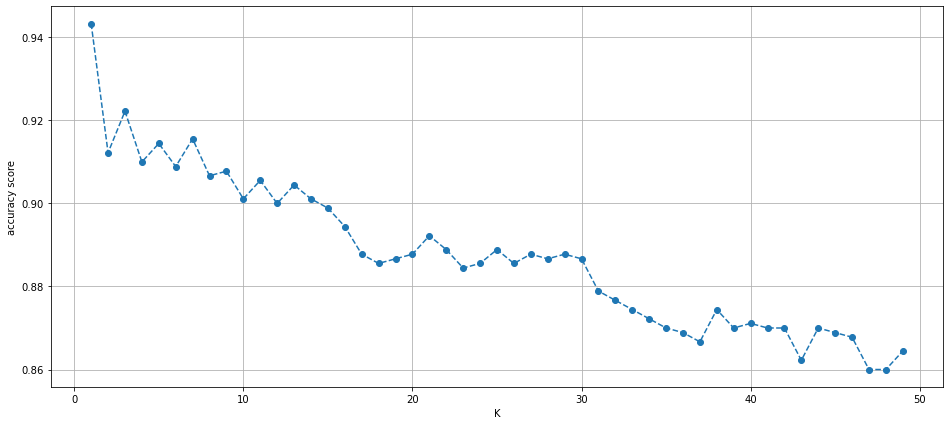

In [18]:
plt.figure(figsize=(16, 7))
plt.xlabel('K')
plt.ylabel('accuracy score')

score_num=[]

for K in range(1,50):
    Y_pred=KNNClassifier(x_train, y_train, x_test,K)
    score=metrics.accuracy_score(y_test,Y_pred)
    score_num.append(score)
    #print(score)
    
plt.plot(range(1,50),score_num,linestyle='--', marker='o')
plt.grid()
plt.show()

In [22]:
print(classification_report(y_test,y_pred))#text report showing the main classification metrics

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       138
           1       0.94      0.96      0.95       762

    accuracy                           0.92       900
   macro avg       0.85      0.80      0.83       900
weighted avg       0.91      0.92      0.91       900



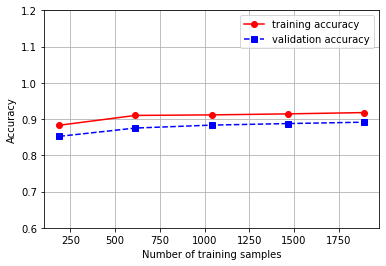

In [38]:
#plot the learning curve
train_sizes,train_scores,test_scores = learning_curve(KNeighborsClassifier(n_neighbors=7),x_train,y_train,cv=10,n_jobs=4,scoring='accuracy')

train_sizes, train_scores, test_scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o',label='training accuracy')
plt.plot(train_sizes, test_mean, color='b', linestyle='--',marker='s', label='validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.6, 1.2])
plt.show()

In [17]:
#metrics
print(f"accuracy：{accuracy_score(y_test, y_pred)}")
print(f"precision：{precision_score(y_test, y_pred)}")
print(f"recall：{recall_score(y_test, y_pred)}")
print(f"F1-score：{f1_score(y_test, y_pred)}")

accuracy：0.9155555555555556
precision：0.9375
recall：0.9645669291338582
F1-score：0.9508408796895214


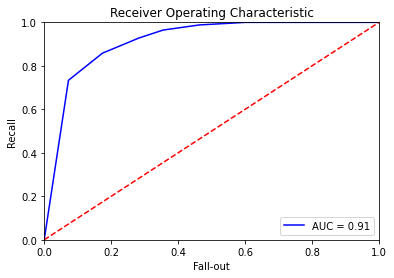

In [21]:
#ROC curve and AUC
predictions = neigh.predict_proba(x_test)  
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])  
roc_auc = auc(false_positive_rate, recall)  
plt.title('Receiver Operating Characteristic')  
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show()  